In [5]:
import pandas as pd
import scanpy as sc
from anndata import AnnData
import numpy as np
from _utils import create_anndata
from pathlib import Path
import matplotlib.pyplot as plt

In [6]:
# Day3_Markers_Dryad = pd.read_csv('Day3_Markers_Dryad.csv', delimiter=',', header=0,index_col=0)
if Path('protein_data.h5ad').exists():
    adata = sc.read_h5ad('protein_data.h5ad')
else:
    adata = create_anndata()
adata

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/georgeweale/4460_Project-2/_utils.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['os_binary'][mask] = os_dict[donor]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))
/Librar

AnnData object with n_obs × n_vars = 5019159 × 57
    obs: 'cellid', 'donor', 'CCL5', 'Cell_Type_Common', 'Cell_Type_Sub', 'CD38', 'filename', 'region', 'x', 'y', 'Cell_Type', 'Overall_Cell_Type', 'Neighborhood', 'os_binary'
    uns: 'metadata'

In [7]:
print(adata.obs['donor'].value_counts())

donor
21_06_23_Melanoma    1529651
18_06_23_Melanoma     976931
14_06_23_Melanoma     593661
23_07_01_Melanoma     541059
05_06_23_Melanoma     472284
23_06_26_Melanoma     306068
23_07_03_Melanoma     219962
23_06_30_Melanoma     118650
23_07_06_Melanoma     102943
30_05_23_Melanoma      65639
23_06_23_Melanoma      63643
13_06_23_Melanoma      28668
Name: count, dtype: int64


In [8]:
adata_1 = adata[adata.obs['donor'] == '13_06_23_Melanoma']
adata_2 = adata[adata.obs['donor'] == '23_06_23_Melanoma']
# sc.pp.pca(adata_1)
# sc.pp.neighbors(adata_1)
# sc.pl.umap(adata_1, color='Cell_Type')
# sc.pl.pca(adata_1, color='Cell_Type')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/plotting/_utils.py:487: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


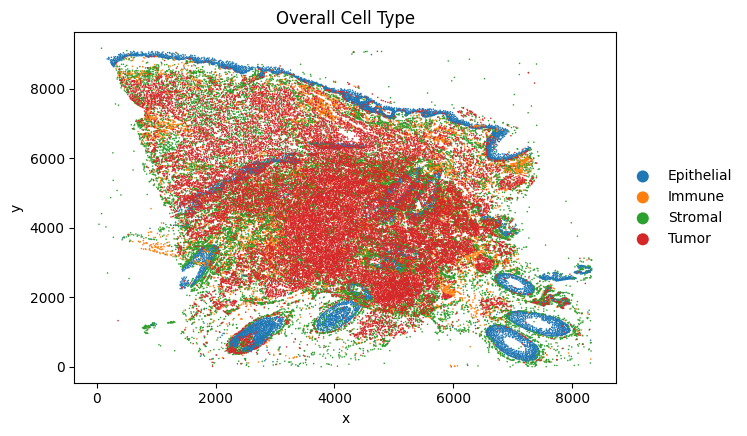

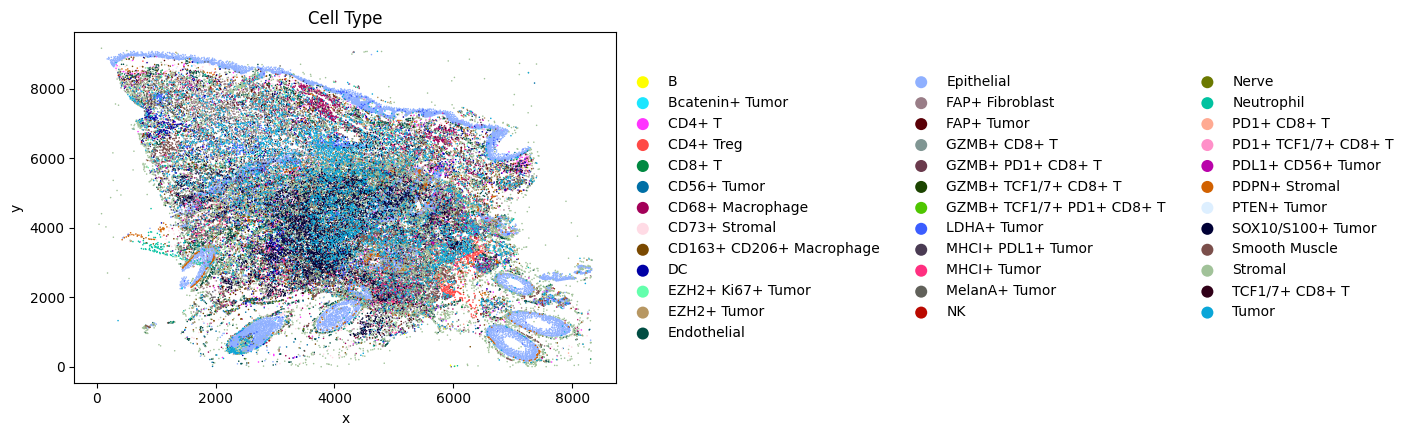

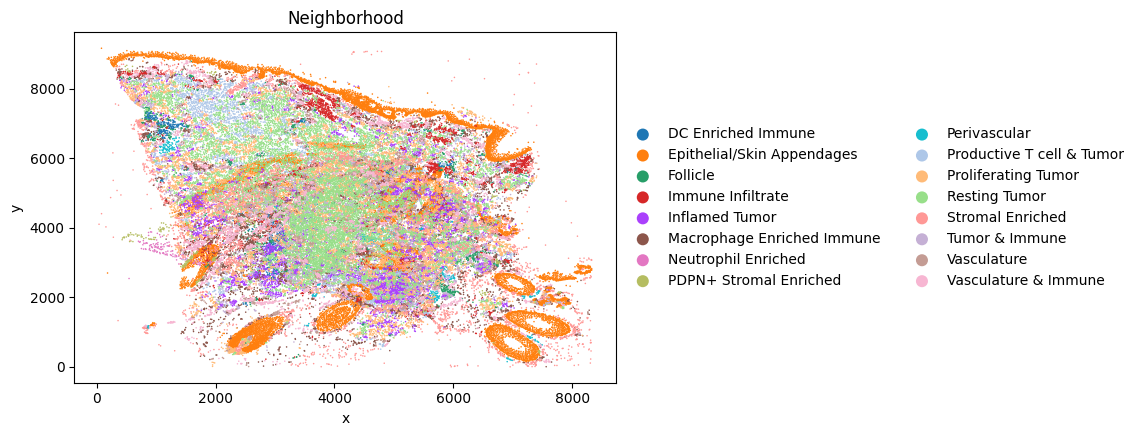

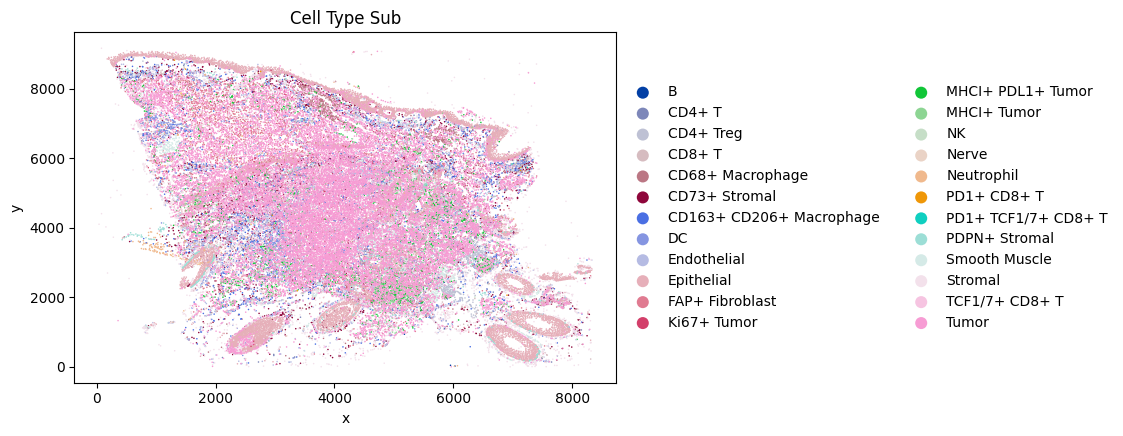

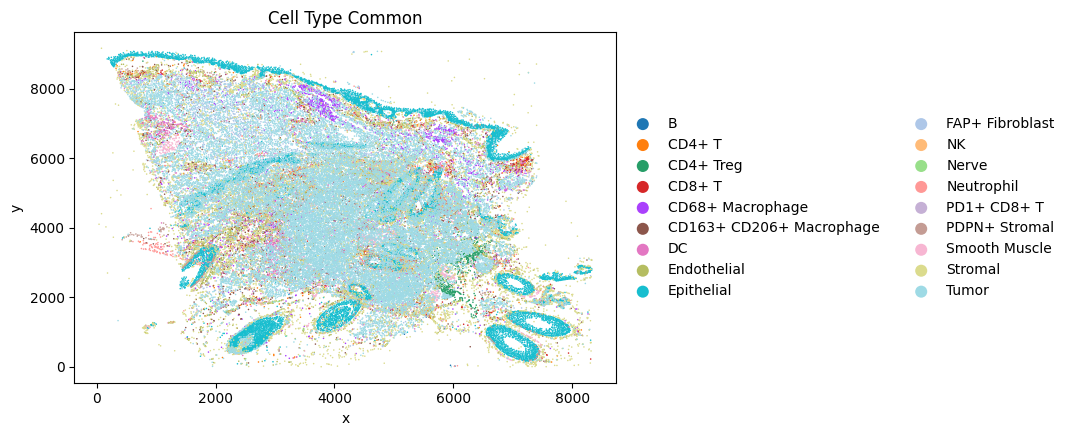

In [9]:
sc.pl.scatter(adata_2, x='x', y='y', color='Overall_Cell_Type', size=5)
sc.pl.scatter(adata_2, x='x', y='y', color='Cell_Type', size=5)
sc.pl.scatter(adata_2, x='x', y='y', color='Neighborhood', size=5)
sc.pl.scatter(adata_2, x='x', y='y', color='Cell_Type_Sub', size=5)
sc.pl.scatter(adata_2, x='x', y='y', color='Cell_Type_Common', size=5)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca
2025-03-07 15:20:10.368277: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


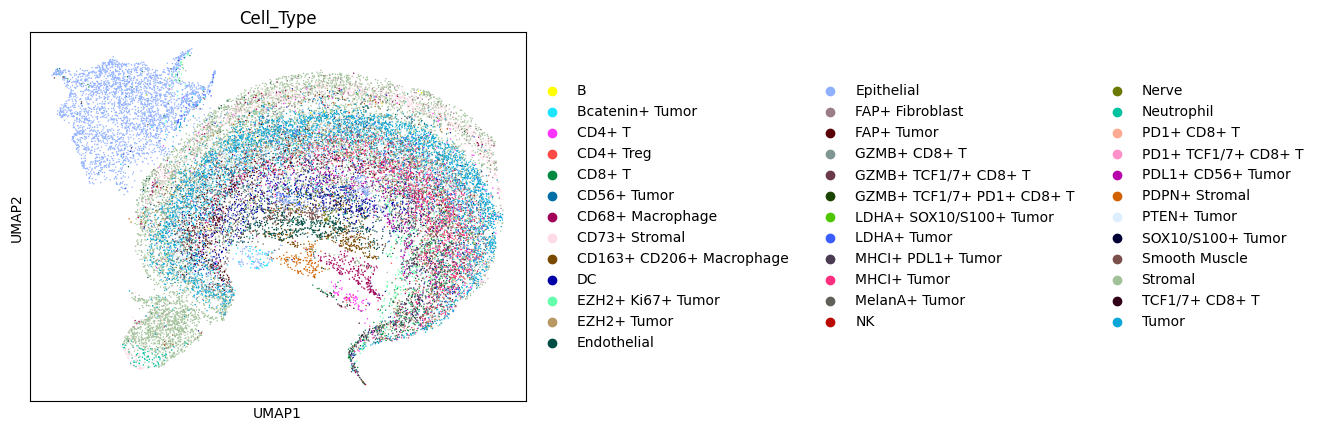

In [10]:
sc.pp.pca(adata_1)
sc.pp.neighbors(adata_1, n_neighbors=10,use_rep='X_pca')
sc.tl.umap(adata_1)
sc.pl.umap(adata_1, color='Cell_Type')

In [11]:
adata_donor

NameError: name 'adata_donor' is not defined

In [ ]:
# take the mean of the expression of each gene for each donor
mean = []
os_binary = []
for donor in adata.obs['donor'].unique():
    num_samples_from_each_donor = 50
    for i in tqdm(range(num_samples_from_each_donor), desc=f"donor {donor}",total=num_samples_from_each_donor):
        adata_donor = adata[adata.obs['donor'] == donor].copy()
        adata_donor = adata_donor[np.random.choice(adata_donor.n_obs, 1000, replace=False)]
        adata_donor_mean = adata_donor.X.mean(axis=0)
        mean.append(adata_donor_mean)
        os_binary.append(adata_donor.obs['os_binary'].values[0]) 
    # adata_donor = adata[adata.obs['donor'] == donor]
    # adata_donor_mean = adata_donor.X.mean(axis=0)
    # # adata_donor_mean = adata_donor_mean.reshape(1, -1)
    # # mean[donor] = adata_donor_mean
    # os_binary.append(adata_donor.obs['os_binary'].values[0])
    # mean.append(adata_donor_mean)

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(np.array(mean))
pca_embed = pca.transform(np.array(mean))
pca.explained_variance_ratio_

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

/tmp/ipykernel_38958/4006053079.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


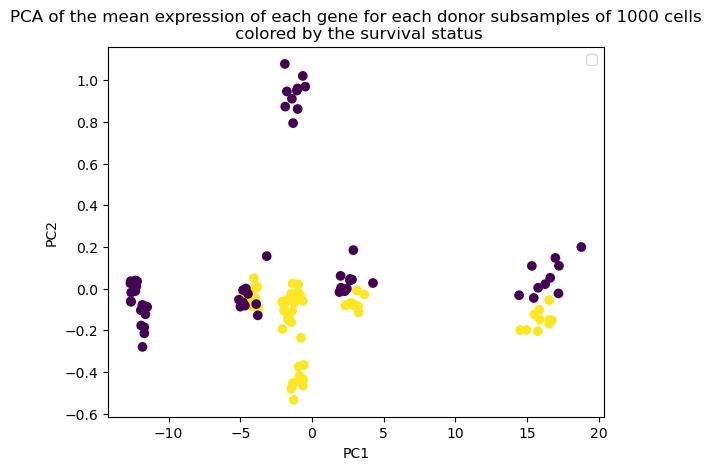

In [36]:
# plot the pca and color by the binary os
plt.scatter(pca_embed[:, 0], pca_embed[:, 1], c=pd.Categorical(os_binary).codes)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('PCA of the mean expression of each gene for each donor subsamples of 1000 cells\n colored by the survival status')
plt.show()


In [ ]:
# plot in 3d 
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)
pca.fit(np.array(mean))
pca_embed = pca.transform(np.array(mean))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_embed[:, 0], pca_embed[:, 1], pca_embed[:, 2], c=pd.Categorical(os_binary).codes)
plt.show()

In [40]:
# make a linear regression to predict the survival status from the pca
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(mean, os_binary, test_size=0.3)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.7777777777777778